# SFML Project
This is the project of **Statistical foundation of machine learning** course at **Vrije Universiteit Brussels**.</br>
Team members:</br>
1. **Name:** Ardavan Khalij </br> **Student number:** 0585706
2. **Name:** Mudabbir Faheem Hamza </br> **Student number:** 0574459

## Algorithms that we are using
### Decision tree
Decision trees contain decision nodes and leaf nodes. The decision nodes contain conditions to split the data. So in each decision node, we make a condition that classifies some of the data. For example, if x=<-2, then the class is equal to 1, so we save this condition based on the data we have and use this condition later for the classification of the other data. So in each step and condition, the pure results will become a leaf node, and the result that is not pure will be another decision node. So, in the end, we have several conditions that define each class, so for testing, the algorithm only checks the conditions and then classifies the data in the class that matches the data. </br>
Of course, we should mention that for more complex data structures, it is possible that the algorithm does not find a condition that makes pure data, so it uses the majority class for that area. </br>
However, this is not all of it. There can be infinite conditions for our tree, so how the decision tree will find these conditions? This is the central part of the algorithm. The answer to this question lies in the information theory. So the model chooses the conditions that gain maximum data.</br>
So how the tree calculates the gain amount of data? It uses entropy to find it based on this formula:
$$
Entropy = \sum{p(i) \times log(\frac{1}{p(i)})}
$$
That p(i) is the probability of i th class. So we calculate the information gained with this formula:
$$
IG = Entropy(Parent) - \sum{(w_i) \times Entopy(Child_i)}
$$
So the algorithm checks all possible ways and chooses the best one.
### Gaussian naive bayes
#### Bayes Theorem
It is basically combining two equations. We know that
$$
P(A|B) = \frac{P(A\cap B)}{P(B)}
$$
and
$$
P(B|A) = \frac{P(B\cap A)}{P(A)}
$$
and because
$$
P(A\cap B) = P(B\cap A)
$$
So based on these, we have the Bayes formula
$$
P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}
$$
#### Gaussian Naive Bayes
It is used for numerical or continuous features. The distribution of continuous values is assumed to be Gaussian. Moreover, therefore the likelihood probabilities are computed based on Gaussian distribution.</br>
So for classification, we should use
$$
P(Class|Data) = \frac{P(Data|Class) \times P(Class)}{P(Data)}
$$
So based on this formula and the data we already have, it calculates the possibility of data being in each class and chooses the bigger probability. For example, if we want to do this classification on a dataset. First of all, we calculate the probability of being in each class, and then for the Gaussian part, we need to calculate μ and σ for each factor and each class of the data, and then, based on these results, new data can be classified.
### Linear regression
As you know, a linear equation is an equation with this form:
$$
y = β_0 + β_1 x
$$
The aim here is to fit a line on our data. This algorithm checks the ε or errors of data based on the line and tries to make these errors minimum, and finally, it chooses the line based on the errors. So our linear model will look like this:
$$
y = β_0 + β_1 x + ε
$$
### Polynomial regression
As you know a polynomial equation is a equation with this form:
$$
y = β_0 + β_1 x + β_2 x^2 + β_3 x^3 + ... + β_n x^n
$$
The other name for polynomial regression is polynomial linear regression, so the same approach. This algorithm checks the ε or errors of data based on the line and tries to make these errors minimum, and finally, it chooses the curve based on the errors. So our polynomial model will look like this:
$$
y = β_0 + β_1 x + β_2 x^2 + β_3 x^3 + ... + β_n x^n + ε
$$
## Coding, experiments, and scientific questions
### Install libraries
First, we need to install the libraries for our project. You can use this part if you do not have one of these libraries on your computer.

In [87]:
# pip install numpy
# pip install matplotlib
# pip install pandas
# pip install sklearn

### Import Libraries
After we install the libraries, we should import all of the libraries.

In [88]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

### Producing the synthetic data
For this part, we used the pandas library. We Choose the line y=x; if y›x, then y=1, else y=0. So we made this dataset for some experiments on the classification.
#### Number of Records
We have 5000 records in our synthetic dataset.

In [89]:
N = 5000

#### Generate data
We start to generate data. Our data is 2D, and numbers are integers between 0 to 250.

In [90]:
X = np.random.randint(0, 250, (N, 2))
Y1 = np.ones(N)

#### Label the data
We label the data for our experiments. We Choose the line y=x, if y›x, then y=1, else y=0.

In [91]:
Y1[X[:, 0] <= X[:, 1]] = 0
Y2 = Y1

#### Flip the labels make the data non-separable
For now, we only flip 1% of the data

In [92]:
for i in range(0, len(Y1)):
    r = np.random.uniform(0, 1)
    if r <= 0.01:
        if Y1[i] == 0:
            Y1[i] = 1
        else:
            Y1[i] = 0

#### Name of the columns
We are setting names for the columns.

In [93]:
Synthetic_df_X = pd.DataFrame(X, columns=['First column', 'Second column'])
Synthetic_df_Y1 = pd.DataFrame(Y1, columns=['Result'])

You can also see the data in a scatter plot.

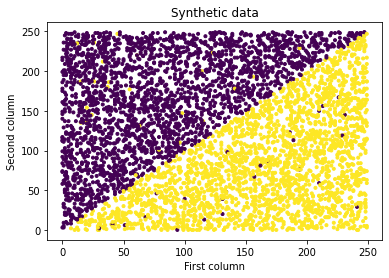

In [94]:
fig = plt.figure()
ax = plt.axes()
First_element = Synthetic_df_X['First column']
Second_element = Synthetic_df_X['Second column']
Result = Synthetic_df_Y1['Result']
ax.scatter(First_element, Second_element, c=Result, marker=".")
plt.title("Synthetic data")
plt.xlabel('First column')
plt.ylabel('Second column')
plt.show()

We can start our scientific questions now that we have made our synthetic dataset.
## Scientific question 1: What is the impact of mislabeled training examples on the performance?
So first, we try the classification algorithms that we mentioned before, and we do two experiments and compare both classification algorithms with 1% fliped label, and 10% fliped label data.
Train_test_split 80% data for training and keep 20% testing

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(Synthetic_df_X, Synthetic_df_Y1, test_size=0.2, random_state=0)

### Experiment 1: impact of mislabeled training examples on the performance of decision tree classification
First we try it with 1% fliped data.

In [96]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(X_train, Y_train)
y_prediction_Decision_Tree_1_percent = dt.predict(X_test)

And then we have the results. The first one is Accuracy:

In [97]:
print("Accuracy: ", str(100*accuracy_score(Y_test, y_prediction_Decision_Tree_1_percent)) + "%")

Accuracy:  97.2%


Confusion matrices can give us more information about how well our model does for each outcome, but because our data is balanced, this factor is not that important.

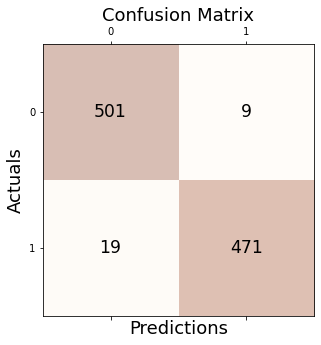

In [98]:
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_prediction_Decision_Tree_1_percent)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

So based on this result, the algorithms' performance is acceptable.

The model accuracy score is the percentage of correctly predicted labels that are right. The positive predictive value is another name for precision. To balance false positives and negatives, precision is utilized in combination with recall. The class distribution has an impact on precision. Precision will be worse if there are more samples in the minority class. Precision may be thought of as a metric for how accurate or good something is. We will use a model with high precision if we wish to reduce false negatives. </br>
In contrast, we would pick a model with a high recall if we wanted to reduce false positives. Precision is more useful when predicting the positive class. False positives have a higher price tag than false negatives.
$$
Precision = \frac{TP}{FP + TP}
$$

In [99]:
print('Precision: %.3f' % precision_score(Y_test, y_prediction_Decision_Tree_1_percent))

Precision: 0.981


$$
Recall = \frac{TP}{FN + TP}
$$

In [100]:
print('Recall: %.3f' % recall_score(Y_test, y_prediction_Decision_Tree_1_percent))

Recall: 0.961


The model F1 score represents the model score as a function of accuracy and recall. F-score is a machine learning model performance statistic that weighs Precision and Recalls equally when evaluating the accuracy, making it a viable alternative to Accuracy metrics (it does not require us to know the entire number of observations). It is frequently utilized as a single value that conveys high-level information regarding the output quality of the model. This is a valuable model metric in situations where one tries to optimize accuracy or recall score, and the model performance suffers.
$$
F1-Score = \frac{2 \times Precision \times Recall}{Precision + Recall}
$$

In [101]:
print('F1 Score: %.3f' % f1_score(Y_test, y_prediction_Decision_Tree_1_percent))

F1 Score: 0.971


Now we are testing with 10% fliped data.

In [102]:
for i in range(0, len(Y2)):
    r = np.random.uniform(0, 1)
    if r <= 0.1:
        if Y2[i] == 0:
            Y2[i] = 1
        else:
            Y2[i] = 0

In [103]:
Synthetic_df_X = pd.DataFrame(X, columns=['First column', 'Second column'])
Synthetic_df_Y2 = pd.DataFrame(Y2, columns=['Result'])

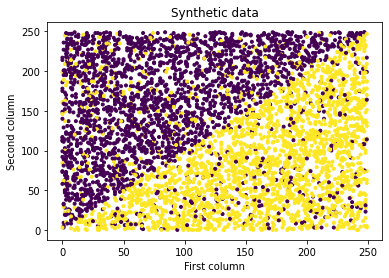

In [104]:
fig = plt.figure()
ax = plt.axes()
First_element = Synthetic_df_X['First column']
Second_element = Synthetic_df_X['Second column']
Result = Synthetic_df_Y2['Result']
ax.scatter(First_element, Second_element, c=Result, marker=".")
plt.title("Synthetic data")
plt.xlabel('First column')
plt.ylabel('Second column')
plt.show()

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(Synthetic_df_X, Synthetic_df_Y2, test_size=0.2, random_state=0)

In [107]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(X_train, Y_train)
y_prediction_Decision_Tree_10_percent = dt.predict(X_test)

In [109]:
print("Accuracy: ", str(100*accuracy_score(Y_test, y_prediction_Decision_Tree_10_percent)) + "%")

Accuracy:  79.80000000000001%


So the accuracy is reduced by about 20%, and it is clear that we have more data that does not follow the general pattern.

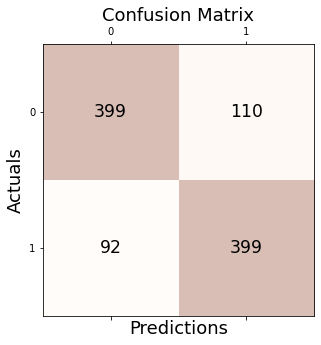

In [110]:
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_prediction_Decision_Tree_10_percent)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

However, we can see that the correct predictions in 0 and 1 are still balanced, and this is because the data is balanced.

In [112]:
print('Precision: %.3f' % precision_score(Y_test, y_prediction_Decision_Tree_10_percent))
print('Recall: %.3f' % recall_score(Y_test, y_prediction_Decision_Tree_10_percent))
print('F1 Score: %.3f' % f1_score(Y_test, y_prediction_Decision_Tree_10_percent))

Precision: 0.784
Recall: 0.813
F1 Score: 0.798


Again we can see a reduction of about 20% in all of the results, all because of the balance of the data.